# Simulating Chaotic Circuit in Python

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
import scipy.interpolate as interpolate
from tools import Circuit, local_max, unique_maxs, phase_diagram

### Test Circuit, Time Series &amp; Phase Portrait

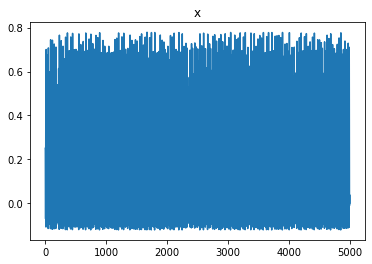

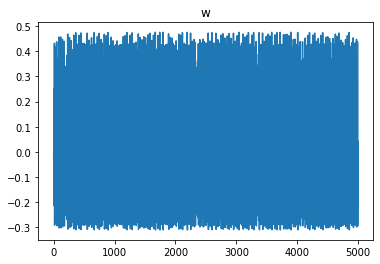

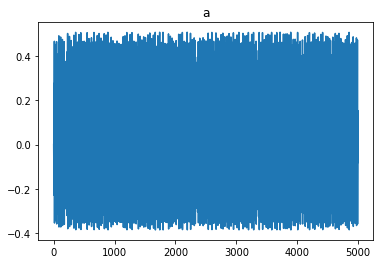

0.047


(-0.5, 0.8)

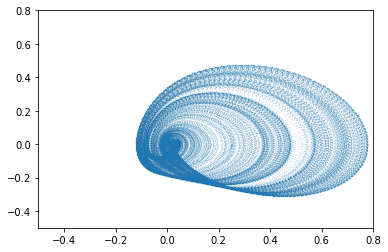

In [3]:
test = Circuit(90)
x = np.linspace(0,5000,100000)
y0 = [0.25, 0, 0]
tspan = (0, max(x))
sol = test.solve(tspan, y0, plot = True, phase = False, t_eval = x) # lol nope lmao, good catch
print(test.Tc)
phase_diagram(sol, '.', markersize = 0.1)
plt.xlim((-0.5,0.8))
plt.ylim((-0.5,0.8))

### Generate Power Spectrum

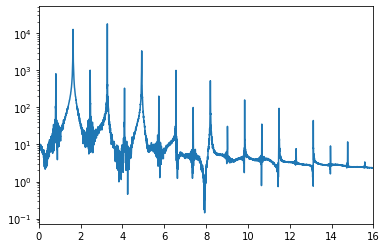

In [4]:
# Power Spectrum Code Sampled From https://stackoverflow.com/questions/15382076/plotting-power-spectrum-in-python

circuit = Circuit(66.4)
time_arr = np.linspace(0,5000,200000)
y0 = [0.25, 0, 0]
tspan = (0, max(time_arr))
sol = circuit.solve(tspan, y0,  t_eval = time_arr)
timestep = max(time_arr)/len(time_arr)


p = np.abs(np.fft.rfft(sol.y[0])) #xdat is in volts and power = V^2 / R so is perportional up to a resistance
f = np.linspace(0,1/(timestep*circuit.Tc*2),len(p))
plt.plot(f, p)


plt.xlim(0,16)
plt.yscale("log")

[8.04462309e+02 1.25882939e+04 1.00050455e+03 1.77269142e+04
 3.28881279e+02 3.32619656e+03 2.00759120e+02 9.90183431e+02
 9.92884596e+01 5.21303937e+02 3.07644602e+01 1.58415959e+02
 3.53824101e+01 9.40691072e+01 7.71831511e+00 4.42830848e+01
 9.13122207e+00 1.17492000e+01 3.38791975e+00 5.94432724e+00
 3.04953824e+00 3.09434755e+00 2.49138336e+00 2.56797277e+00
 1.87156806e+00 3.32774486e+00 2.29401471e+00 2.55546154e+00
 1.63359526e+00 2.10590572e+00]
[ 193  386  578  771  964 1157 1349 1542 1735 1928 2120 2313 2506 2699
 2891 3084 3277 3470 3662 3855 4048 4240 4434 4628 4818 5011 5205 5397
 5589 5782]


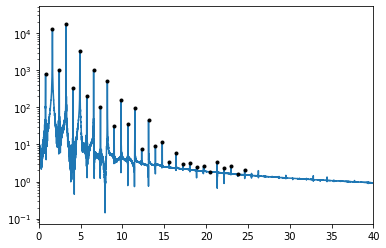

In [5]:
plt.plot(f, p)
plt.xlim(0,40)
plt.yscale("log")

maxs, indexes = local_max(p[:6000], N = 100)
print(maxs)
print(indexes)

plt.plot(f[indexes], maxs, 'k.')
lowest_f = f[indexes[0]]



### Generate Bifurcation Plot

In [6]:
Rv_arr = np.arange(50,130,0.1)
y0 = [0.25, 0, 0]
time_arr = np.linspace(200,500,2000)
tspan = (0, max(x))
bifurcation = circuit.bifurcation(Rv_arr, tspan, y0, t_eval = time_arr, N = 400, rtol = 1e-9)
print(len(bifurcation))

800
/work/Analysis/tools.py:132: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(ret)


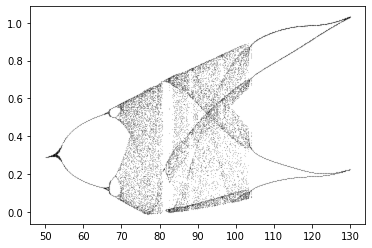

In [7]:
for Rv, bif in zip(Rv_arr, bifurcation):
    plt.plot(Rv*np.ones(len(bif)), bif, 'k.', markersize = 0.1)

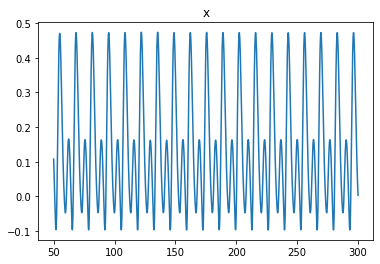

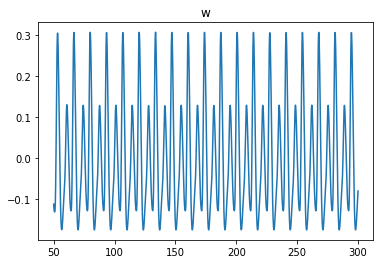

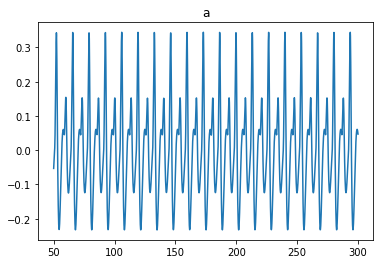

In [8]:
circuit = Circuit(60)
time_arr = np.linspace(50,300,2000)
y0 = [0.25, 0, 0]
tspan = (0, max(time_arr))
sol = circuit.solve(tspan, y0,  t_eval = time_arr, plot = True)
timestep = max(time_arr)/len(time_arr)

In [ ]:
# f_array = f[indfo
# amplitude_array = maxs/np.linalg.norm(maxs)


# def clean_signal(x):
#     y = 0
#     for frequency, amplitude in zip(f_array, amplitude_array):
#         y += amplitude*np.sin(x*frequency)
#     return y


# dx = np.linspace(0,100,1000)
# dy = clean_signal(dx)
# plt.plot(dx,dy)


In [ ]:
def local_max(arr, N = 3):
    local_maxs = []
    
    #loop through the array
    i = N
    indexes = []
    
    while i < len(arr) - 1 - N:
        
        iterate = 1
        #flag
        local_max = True
        
        for j in range(N):
            if arr[i] < arr[i + j]:
                local_max = False
                iterate = j
                break
                
            elif arr[i] < arr[i - j]:
                local_max = False
                break
            
        if local_max:
            local_maxs.append(arr[i])
            indexes.append(i)
            
        i += iterate
        
    return np.array(local_maxs), np.array(indexes)

# counting how oftern they occur
def unique_maxs(y: np.array, N = 5, error_tol = 1e-3):
    
    #get local maximums and sort to make finding repeats simple
    maxs, _ = np.sort(local_max(y, N = N))
    
    try:
        unique_maxs = [maxs[0]]

    except IndexError: 
        print('no maxs')
        return np.array(tuple(zip([],[])))

    
    # ok I think this function has what it may need to also save the number of occurences of each max, ah nice, ah ok, will we every have that case or is it easy to cover
    max_counter = [1]

    #remove repeats within a certain error tolerance
    for i in range(1,len(maxs)):
        if np.abs(maxs[i] - unique_maxs[-1]) > error_tol:
            unique_maxs.append(maxs[i])
            max_counter.append(1)
        else:
            max_counter[-1] = max_counter[-1] + 1

    return np.array(tuple(zip(unique_maxs,max_counter)))
    




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4939151a-2261-4374-8b6d-a725368f8dc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>